In [14]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact, chisquare
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
# sharper plots
%config InlineBackend.figure_format = 'retina'

import os, re

#### Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [112]:
root_dir = "E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\4\\Задания\\Минипроект\\data"
df = pd.DataFrame({'name':[], 'product_id':[], 'quantity':[], 'date':[]})
pat = r'\\([^\\]+)\\([^\\]+)$'

for dirpath, dirnames, filenames in os.walk(root_dir):
    for file in filenames:
        match = re.search(pat, str(dirpath))
        date = match[1]
        name = match[2].replace('_',' ')
        csv = pd.read_csv(dirpath + "\\" + file)
        for product_id, quantity in zip(csv.product_id, csv.quantity):
            df = df.append({'name':name, 'product_id':product_id, 'quantity':quantity, 'date':date}, ignore_index=True)

df.date = pd.to_datetime(df.date)
df

,name,product_id,quantity,date
0,Alexey Smirnov,47.0,1.0,2020-12-03
1,Alexey Smirnov,57.0,1.0,2020-12-03
2,Alexey Smirnov,14.0,2.0,2020-12-03
3,Alexey Smirnov,52.0,1.0,2020-12-03
4,Alexey Smirnov,1.0,4.0,2020-12-03
...,...,...,...,...
156,Rostislav Petrov,66.0,4.0,2020-12-09
157,Rostislav Petrov,39.0,2.0,2020-12-09
158,Vasiliy Ivanov,82.0,4.0,2020-12-09
159,Vasiliy Ivanov,74.0,2.0,2020-12-09


#### Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [121]:
users_bought_quantities = df.groupby('name').quantity.sum()
users_bought_quantities[users_bought_quantities == users_bought_quantities.max()]

name
Alexey Smirnov    52.0
Petr Smirnov      52.0
Name: quantity, dtype: float64

#### Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

,product_id,quantity
1,56.0,18.0


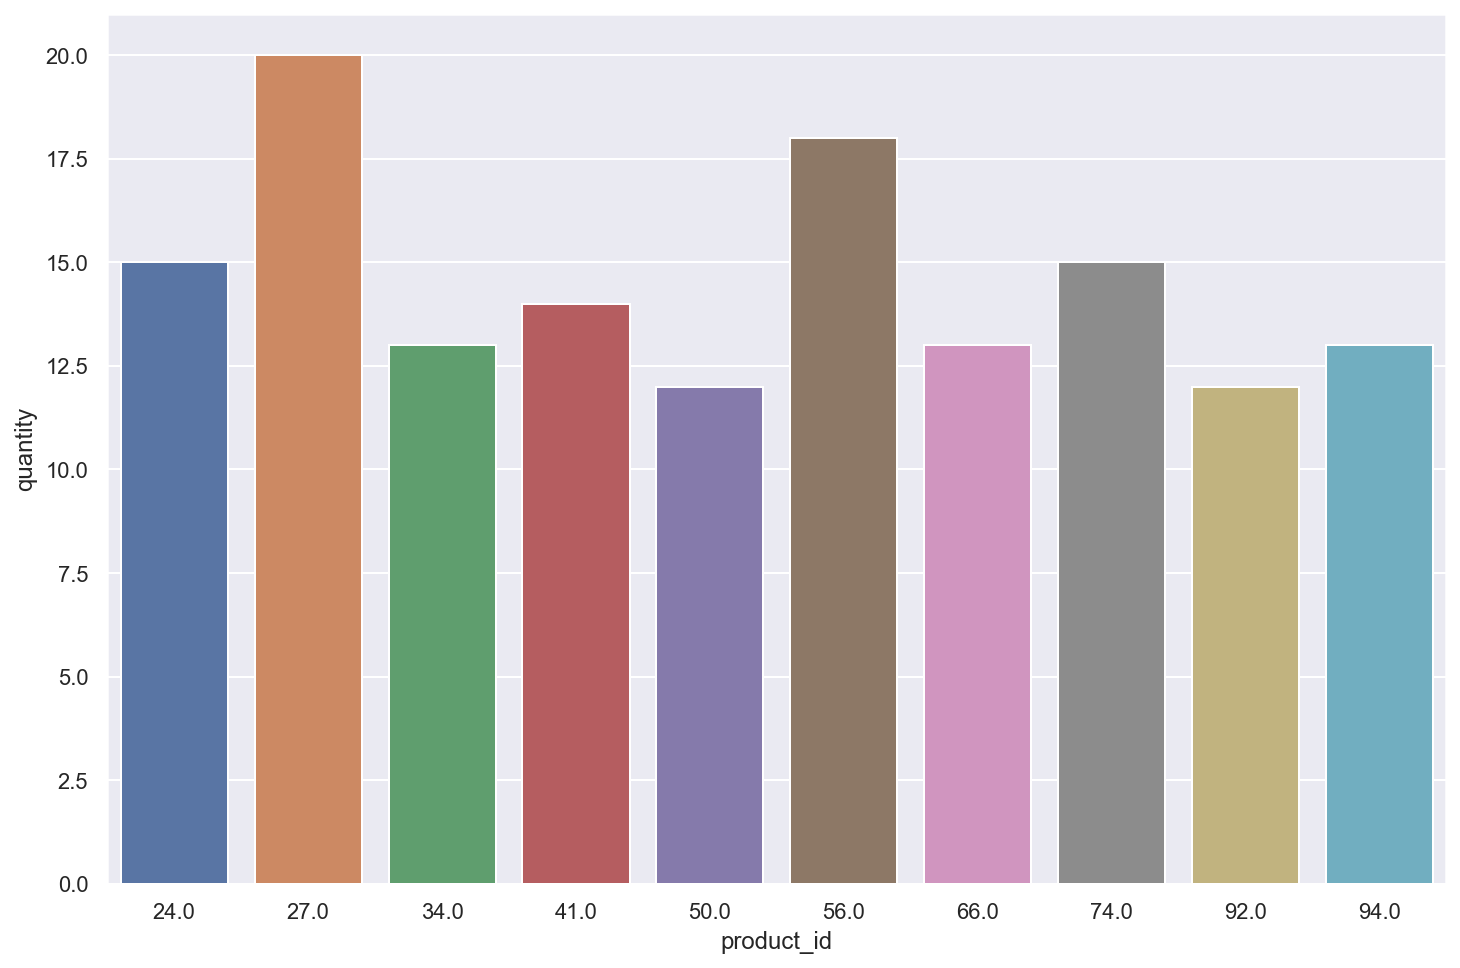

In [143]:
plt.figure(figsize=(12,8))
top_10_sold = df.groupby('product_id').quantity.sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='product_id',y='quantity', data=top_10_sold);
top_10_sold.query('product_id == 56.0')

#### Визуализируйте продажи по дням.

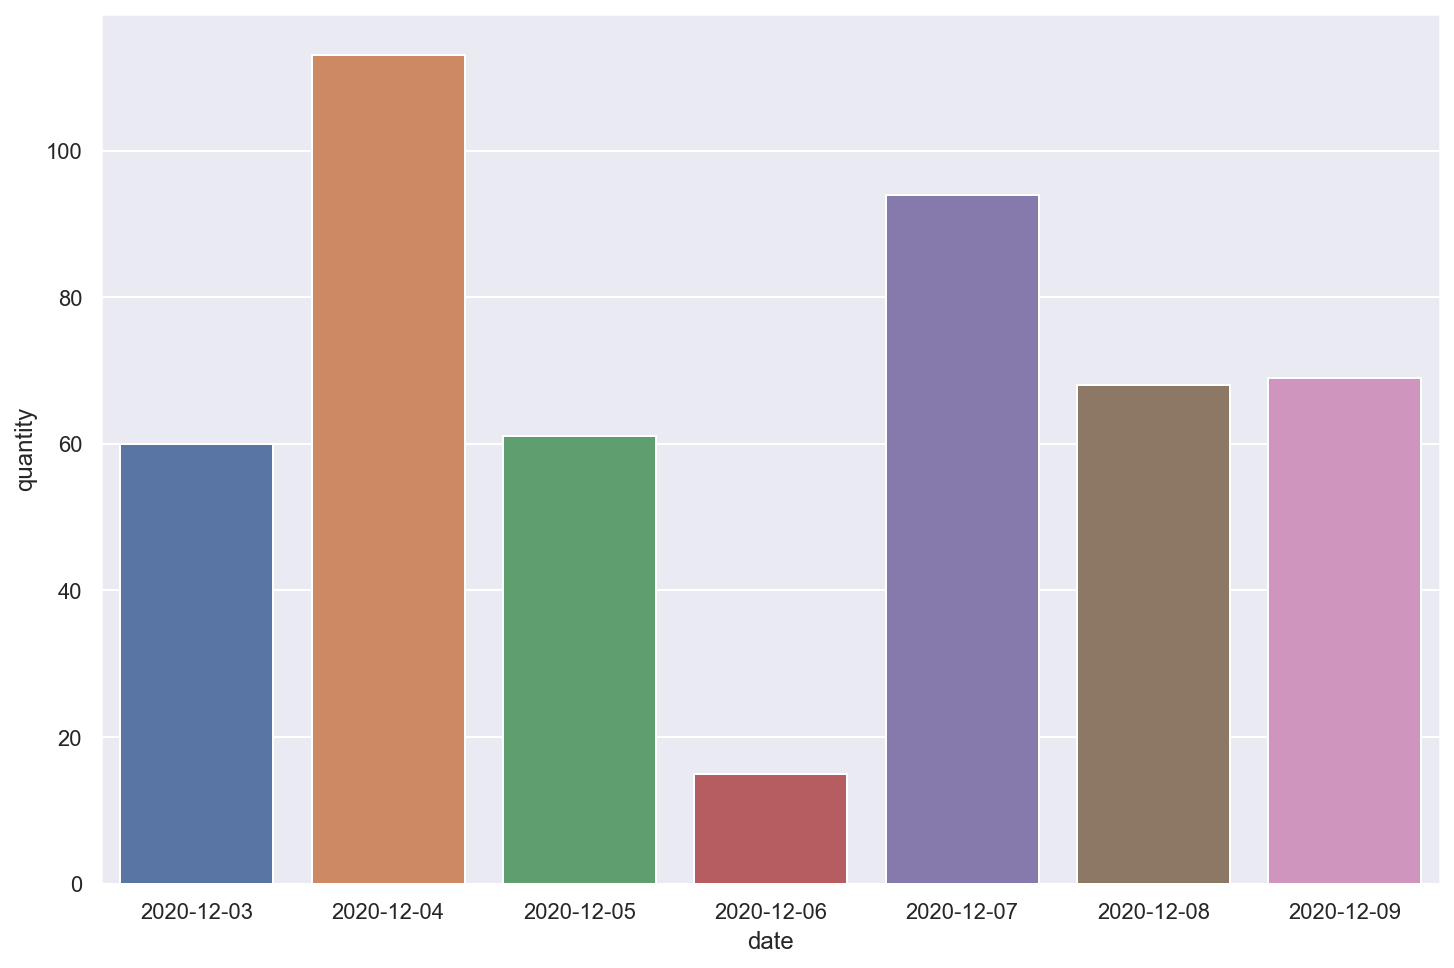

In [160]:
plt.figure(figsize=(12,8))
sales_per_day = df.groupby('date').quantity.sum().reset_index()
ax = sns.barplot(x='date', y='quantity', data=sales_per_day);
x_dates = sales_per_day['date'].dt.strftime('%Y-%m-%d').sort_values().unique();
ax.set_xticklabels(labels=x_dates);

#### Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [178]:
df.groupby(['name', 'product_id']).date.nunique().reset_index().query('date > 1')

,name,product_id,date
37,Anton Ivanov,15.0,2
92,Petr Fedorov,94.0,2
